Meriselle Ruotolo
Midterm Project

In [1]:
import struct
import gzip
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.display import Image
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC, SVR # possibly unnecessary
from mpl_toolkits.mplot3d import Axes3D

In this assignment,... words words words explanation least squares binary classifier linear regression model stuff
The first several cells below is simply set up and testing that the data has been properly imported and set up.

In [2]:
train = dict()
test = dict()
def get_images(filename):
    with gzip.GzipFile(Path(filename), 'rb') as f:
        magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
        print(magic, size, rows, cols)
        images = np.frombuffer(f.read(), dtype=np.dtype('B'))
        return images.reshape(size, rows, cols)
train['image'] = get_images('train-images-idx3-ubyte.gz')
test['image'] = get_images('t10k-images-idx3-ubyte.gz')
print(train['image'].shape, test['image'].shape)

2051 60000 28 28
2051 10000 28 28
(60000, 28, 28) (10000, 28, 28)


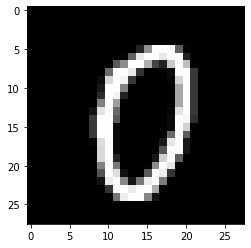

In [3]:
fig, ax = plt.subplots()
_ = ax.imshow(train['image'][1000], cmap = 'gray')

In [4]:
def get_labels(filename):
    with gzip.GzipFile(Path(filename), 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.dtype('B'))
    return labels
train['label'] = get_labels('train-labels-idx1-ubyte.gz')
test['label'] = get_labels('t10k-labels-idx1-ubyte.gz')
print(train['label'].shape, test['label'].shape)

(60000,) (10000,)


In [5]:
# Checking to see if the labels are within the expected values
np.unique(train['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**PART I**

In part one, we will be taking a least-squares binary classifer and creating a classifer for each specific digit [0-9]. We will then test our classifier with the handwritten mnist digit set and count the number of correctly identified hand-written digits using our classifier. We will anaylze its accuracy. 
The least-squares binary classifer we will be using is the linear regression module.

**LEAST SQUARES LINEAR REGRESSION AS A BINARY CLASSIFIER:**
First, we must partition our data to x and y axis. We will be training our binary classifer with the "training set." 

__We will set up the x and y axis for the training set for the digit zero:__

In [12]:
x0 = np.zeros((60000, 28 * 28))
y0 = np.zeros((60000,))

for i in range(len(train['image'])):
    x0[i] = train['image'][i].flatten()
    y0[i] = 1 if train['label'][i] == 0 else -1

In [13]:
lr = LinearRegression()
lr.fit(x0, y0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# lr.intercept_, lr.coef_

As you can see from above, the image shown is the handwritten digit 5, so the y returned is -1, as it is not the handwritten digit 0.

In [14]:
test_x = np.zeros((10000, 28*28))
test_y = np.zeros((10000,))

for i in range(10000):
    test_x[i] = test['image'][i].flatten()
    test_y[i] = -1 if test['label'][i] != 0 else 1


In [17]:
predict_y = lr.predict(test_x)
np.sum((predict_y > 0) == (test_y > 0))

9843

Surprisingly, the succuss rate for using linear regression as a binary classifier to classify the digit zero has a success rate of 98.43%. I suspect that there are many false positives.  # CHECK FALSE POSITIVES 

I will now check the rest of the digits as well and see the success rate for each specific digit. 

The process may seem repetitive. The end of part one will display all the success rates and overall success rate of the binary classifier. There will be no other new information in this section, so going to PART II from here may be beneficial.

__Binary Classifier for digit one:__

In [18]:
x1 = np.zeros((60000, 28 * 28))
y1 = np.zeros((60000,))

for i in range(len(train['image'])):
    x1[i] = train['image'][i].flatten()
    y1[i] = 1 if train['label'][i] == 1 else -1
    
lr = LinearRegression()
lr.fit(x1, y1)

test_x = np.zeros((10000, 28*28))
test_y = np.zeros((10000,))

for i in range(10000):
    test_x[i] = test['image'][i].flatten()
    test_y[i] = -1 if test['label'][i] != 1 else 1
    
predict_y = lr.predict(test_x)
np.sum((predict_y > 0) == (test_y > 0))


9833

In [19]:
x2 = np.zeros((60000, 28 * 28))
y2 = np.zeros((60000,))

for i in range(len(train['image'])):
    x2[i] = train['image'][i].flatten()
    y2[i] = 1 if train['label'][i] == 2 else -1
    
lr = LinearRegression()
lr.fit(x2, y2)

test_x = np.zeros((10000, 28*28))
test_y = np.zeros((10000,))

for i in range(10000):
    test_x[i] = test['image'][i].flatten()
    test_y[i] = -1 if test['label'][i] != 2 else 1
    
predict_y = lr.predict(test_x)
np.sum((predict_y > 0) == (test_y > 0))


9582

In [20]:
x3 = np.zeros((60000, 28 * 28))
y3 = np.zeros((60000,))

for i in range(len(train['image'])):
    x3[i] = train['image'][i].flatten()
    y3[i] = 1 if train['label'][i] == 3 else -1
    
lr = LinearRegression()
lr.fit(x3, y3)

test_x = np.zeros((10000, 28*28))
test_y = np.zeros((10000,))

for i in range(10000):
    test_x[i] = test['image'][i].flatten()
    test_y[i] = -1 if test['label'][i] != 3 else 1
    
predict_y = lr.predict(test_x)
np.sum((predict_y > 0) == (test_y > 0))


9601

In [25]:
x4 = np.zeros((60000, 28 * 28))
y4 = np.zeros((60000,))

for i in range(len(train['image'])):
    x4[i] = train['image'][i].flatten()
    y4[i] = 1 if train['label'][i] == 4 else -1
    
lr = LinearRegression()
lr.fit(x4, y4)

test_x = np.zeros((10000, 28*28))
test_y = np.zeros((10000,))

for i in range(10000):
    test_x[i] = test['image'][i].flatten()
    test_y[i] = -1 if test['label'][i] != 4 else 1
    
predict_y = lr.predict(test_x)
np.sum((predict_y > 0) == (test_y > 0))

9665

In [30]:
x5 = np.zeros((60000, 28 * 28))
y5 = np.zeros((60000,))

for i in range(len(train['image'])):
    x5[i] = train['image'][i].flatten()
    y5[i] = 1 if train['label'][i] == 5 else -1
    
lr = LinearRegression()
lr.fit(x5, y5)

test_x = np.zeros((10000, 28*28))
test_y = np.zeros((10000,))

for i in range(10000):
    test_x[i] = test['image'][i].flatten()
    test_y[i] = -1 if test['label'][i] != 5 else 1
    
predict_y = lr.predict(test_x)
np.sum((predict_y > 0) == (test_y > 0))

9466

In [31]:
x6 = np.zeros((60000, 28 * 28))
y6 = np.zeros((60000,))

for i in range(len(train['image'])):
    x6[i] = train['image'][i].flatten()
    y6[i] = 1 if train['label'][i] == 6 else -1
    
lr = LinearRegression()
lr.fit(x6, y6)

test_x = np.zeros((10000, 28*28))
test_y = np.zeros((10000,))

for i in range(10000):
    test_x[i] = test['image'][i].flatten()
    test_y[i] = -1 if test['label'][i] != 6 else 1
    
predict_y = lr.predict(test_x)
np.sum((predict_y > 0) == (test_y > 0))

9741

In [32]:
x7 = np.zeros((60000, 28 * 28))
y7 = np.zeros((60000,))

for i in range(len(train['image'])):
    x7[i] = train['image'][i].flatten()
    y7[i] = 1 if train['label'][i] == 7 else -1
    
lr = LinearRegression()
lr.fit(x7, y7)

test_x = np.zeros((10000, 28*28))
test_y = np.zeros((10000,))

for i in range(10000):
    test_x[i] = test['image'][i].flatten()
    test_y[i] = -1 if test['label'][i] != 7 else 1
    
predict_y = lr.predict(test_x)
np.sum((predict_y > 0) == (test_y > 0))

9645

In [33]:
x8 = np.zeros((60000, 28 * 28))
y8 = np.zeros((60000,))

for i in range(len(train['image'])):
    x8[i] = train['image'][i].flatten()
    y8[i] = 1 if train['label'][i] == 8 else -1
    
lr = LinearRegression()
lr.fit(x8, y8)

test_x = np.zeros((10000, 28*28))
test_y = np.zeros((10000,))

for i in range(10000):
    test_x[i] = test['image'][i].flatten()
    test_y[i] = -1 if test['label'][i] != 8 else 1
    
predict_y = lr.predict(test_x)
np.sum((predict_y > 0) == (test_y > 0))


9489

In [34]:
x9 = np.zeros((60000, 28 * 28))
y9 = np.zeros((60000,))

for i in range(len(train['image'])):
    x9[i] = train['image'][i].flatten()
    y9[i] = 1 if train['label'][i] == 9 else -1
    
lr = LinearRegression()
lr.fit(x9, y9)

test_x = np.zeros((10000, 28*28))
test_y = np.zeros((10000,))

for i in range(10000):
    test_x[i] = test['image'][i].flatten()
    test_y[i] = -1 if test['label'][i] != 9 else 1
    
predict_y = lr.predict(test_x)
np.sum((predict_y > 0) == (test_y > 0))

9477

__Overall Success Rate__
Stuff

**PART II**
For Part II, we will modify the current binary classifier to include  the regularization parameter shown in the instruction pdf. 
Then we will display the image corresponding to beta for different values of llambda. 
We will analyze the changes. We will then count the number of correctly identified hand-written digits using this modified classifier. We will see if there is any change in the accuracy as we vary llambda and compare the results to the results of Part I.

**PART III**
We will compute the 10 largest eigenvalues and corresponding eigenvectors of the covariance matrix for the selected digit k of the "train" data set. We will display the eigenvectors as 28x28 images

**PART IV**
Part IV, we will extend the linear formulation of the Least quares in Part 1 to a non-linear Least Squares. More details in the instruction pdf.